In [2]:
#@title Import libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import sklearn.linear_model
import scipy, scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The OECD Gender Data Portal includes selected indicators shedding light on gender inequalities in education, employment, entrepreneurship, health, development and Governance, showing how far we are from achieving gender equality and where actions is most needed. The data cover OECD member countries, as well as partner economies including Brazil, China, India, Indonesia, and South Africa.

https://www.oecd.org/gender/data/

### Datasets

In [3]:
#@title Load dataframes


df_ind = pd.read_csv('https://raw.githubusercontent.com/v-datos/group_project_wage_gap/main/indicators_gender_equality.csv')
df_ind = df_ind[['COU', 'Country', 'IND', 'Indicator', 'SEX', 'AGE', 'TIME', 'Value', 'Unit']]

gender_wage_gap = pd.read_csv('https://raw.githubusercontent.com/v-datos/group_project_wage_gap/main/gender_wage_gap_oecd.csv'
                             ).drop(columns=['Flag Codes']).rename(columns={'Value':'gender_wage_gap'})

avg_wages = pd.read_csv('https://raw.githubusercontent.com/v-datos/group_project_wage_gap/main/average_wage_oecd.csv'
).drop(columns=['Flag Codes']).rename(columns={'Value':'avg_wages'})

wage_levels = pd.read_csv('https://raw.githubusercontent.com/v-datos/group_project_wage_gap/main/wage_label_oecd.csv'
).drop(columns=['Flag Codes']).rename(columns={'Value':'wage_levels'})

pop = pd.read_csv('https://raw.githubusercontent.com/v-datos/group_project_wage_gap/main/population_oecd.csv'
).drop(columns=['Flag Codes']).rename(columns={'Value':'pop'})

gdp = pd.read_csv('https://raw.githubusercontent.com/v-datos/group_project_wage_gap/main/gdp_oecd.csv').drop(columns=['Flag Codes']).rename(columns={'Value':'gdp'})

empl_rate = pd.read_csv('https://raw.githubusercontent.com/v-datos/group_project_wage_gap/main/employment_rate_oecd.csv'
).drop(columns=['Flag Codes']).rename(columns={'Value':'employment_rate'})
empl_rate['TIME'] = pd.to_numeric(empl_rate['TIME'], errors='coerce')


In [4]:
df_ind

,COU,Country,IND,Indicator,SEX,AGE,TIME,Value,Unit
0,AUS,Australia,EMP6,Share of employed in involuntary part-time emp...,ALL_PERSONS,55PLUS,2005,4.5,Percentage
1,AUS,Australia,EMP6,Share of employed in involuntary part-time emp...,ALL_PERSONS,55PLUS,2010,5.0,Percentage
2,AUS,Australia,EMP6,Share of employed in involuntary part-time emp...,MEN,55PLUS,2005,3.6,Percentage
3,AUS,Australia,EMP6,Share of employed in involuntary part-time emp...,MEN,55PLUS,2010,4.2,Percentage
4,AUS,Australia,EMP6,Share of employed in involuntary part-time emp...,WOMEN,55PLUS,2005,5.9,Percentage
...,...,...,...,...,...,...,...,...,...
41314,CHE,Switzerland,EMP9_5,Gender wage gap at median,ALL_PERSONS,TOTAL,2019,17.2,NaN
41315,CHE,Switzerland,EMP9_5,Gender wage gap at median,ALL_PERSONS,TOTAL,2020,13.8,NaN
41316,OAVG,OECD - Average,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,TOTAL,2020,10.2,NaN
41317,OAVG,OECD - Average,EMP9_9,Gender wage gap at 9th decile (top),ALL_PERSONS,TOTAL,2020,16.4,NaN


In [5]:
gender_wage_gap

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,gender_wage_gap
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.582734
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.754717
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.390805
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.791667
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20.000000
...,...,...,...,...,...,...,...
1206,EU27,WAGEGAP,EMPLOYEE,PC,A,2016,11.577666
1207,EU27,WAGEGAP,EMPLOYEE,PC,A,2017,11.331419
1208,EU27,WAGEGAP,EMPLOYEE,PC,A,2018,11.138513
1209,EU27,WAGEGAP,EMPLOYEE,PC,A,2019,11.122339


In [6]:
avg_wages

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,avg_wages
0,AUS,AVWAGE,TOT,USD,A,1990,39875.345702
1,AUS,AVWAGE,TOT,USD,A,1991,39685.259630
2,AUS,AVWAGE,TOT,USD,A,1992,40481.994276
3,AUS,AVWAGE,TOT,USD,A,1993,40854.703847
4,AUS,AVWAGE,TOT,USD,A,1994,41131.575639
...,...,...,...,...,...,...,...
1049,LTU,AVWAGE,TOT,USD,A,2016,24981.557176
1050,LTU,AVWAGE,TOT,USD,A,2017,26382.371107
1051,LTU,AVWAGE,TOT,USD,A,2018,27572.383450
1052,LTU,AVWAGE,TOT,USD,A,2019,29695.402612


In [7]:
empl_rate

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,employment_rate
0,AUS,EMP,MEN,THND_PER,A,1965.0,3346.50
1,AUS,EMP,MEN,THND_PER,A,1966.0,3362.50
2,AUS,EMP,MEN,THND_PER,A,1967.0,3412.50
3,AUS,EMP,MEN,THND_PER,A,1968.0,3474.00
4,AUS,EMP,MEN,THND_PER,A,1969.0,3548.00
...,...,...,...,...,...,...,...
58809,RUS,EMP,WOMEN,THND_PER,M,NaN,34845.88
58810,RUS,EMP,WOMEN,THND_PER,M,NaN,34796.39
58811,RUS,EMP,WOMEN,THND_PER,M,NaN,35026.19
58812,RUS,EMP,WOMEN,THND_PER,M,NaN,34932.68


In [8]:
wage_levels

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,wage_levels
0,AUS,WAGELEVEL,LPAY,PC,A,1975,11.250855
1,AUS,WAGELEVEL,LPAY,PC,A,1976,11.590103
2,AUS,WAGELEVEL,LPAY,PC,A,1977,11.706900
3,AUS,WAGELEVEL,LPAY,PC,A,1978,12.772322
4,AUS,WAGELEVEL,LPAY,PC,A,1979,13.589887
...,...,...,...,...,...,...,...
987,EU27,WAGELEVEL,HPAY,PC,A,2016,21.567796
988,EU27,WAGELEVEL,HPAY,PC,A,2017,21.544624
989,EU27,WAGELEVEL,HPAY,PC,A,2018,21.391421
990,EU27,WAGELEVEL,HPAY,PC,A,2019,21.715991


In [9]:
gdp

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,gdp
0,AUS,GDP,TOT,MLN_USD,A,1960,25073.260000
1,AUS,GDP,TOT,MLN_USD,A,1961,25364.881000
2,AUS,GDP,TOT,MLN_USD,A,1962,27955.357000
3,AUS,GDP,TOT,MLN_USD,A,1963,30432.979000
4,AUS,GDP,TOT,MLN_USD,A,1964,32745.289000
...,...,...,...,...,...,...,...
5005,GEO,GDP,TOT,USD_CAP,A,2016,12858.489885
5006,GEO,GDP,TOT,USD_CAP,A,2017,13589.730377
5007,GEO,GDP,TOT,USD_CAP,A,2018,14595.613876
5008,GEO,GDP,TOT,USD_CAP,A,2019,15623.152943


In [10]:
pop

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,pop
0,AUS,POP,TOT,AGRWTH,A,1951,2.971132
1,AUS,POP,TOT,AGRWTH,A,1952,2.550554
2,AUS,POP,TOT,AGRWTH,A,1953,2.070283
3,AUS,POP,TOT,AGRWTH,A,1954,1.942078
4,AUS,POP,TOT,AGRWTH,A,1955,2.372448
...,...,...,...,...,...,...,...
15843,EU27,POP,WOMEN,MLN_PER,A,2016,227831.860500
15844,EU27,POP,WOMEN,MLN_PER,A,2017,228089.551500
15845,EU27,POP,WOMEN,MLN_PER,A,2018,228375.375500
15846,EU27,POP,WOMEN,MLN_PER,A,2019,228744.232000


### Exploring data

In [11]:
df_ind.IND.unique()

array(['EMP6', 'EMP1', 'EMP2', 'EMP5', 'EMP8', 'EMP13_A', 'EMP13_I',
       'EMP13_S', 'EMP16', 'EMP17', 'EMP18_MAT', 'EMP18_PAR',
       'EMP18_PAID', 'EMP18_PAT', 'EMP12_P', 'EMP12_T', 'EMP7', 'EMP3',
       'EMP11', 'EMP10', 'EMP10NEW', 'EMP9_1', 'EMP9_9', 'EMP9_5'],
      dtype=object)

In [12]:
df_ind.Indicator.value_counts()

Labour force participation rate, by sex and age group                          6735
Employment/population ratio, by sex and age group                              6735
Unemployment rate, by sex and age group                                        6735
Share of employed in part-time employment, by sex and age group                5034
Share of employed in involuntary part-time employment, by sex and age group    4557
Share of employed in temporary employment, by sex and age group                4186
Full-time equivalent employment rate, by sex                                   1033
Expected number of years in retirement, by sex                                  938
Share of employed working in agriculture, by sex                                597
Share of employed working in industry, by sex                                   586
Share of employed working in services, by sex                                   585
Share of employed who are managers, by sex                                  

In [13]:
# Split data set by indicator

df_ind_EMP10 = df_ind[(df_ind['Indicator'] == 'Share of employed who are managers, by sex')
                     ].reset_index(drop=True).rename(columns={'Value':'employed_who_are_managers'})
df_ind_EMP10 = df_ind_EMP10.drop(columns=['IND', 'Indicator'])

df_ind_EMP10NEW = df_ind[(df_ind['Indicator'] == 'Share of female managers')
                     ].reset_index(drop=True).rename(columns={'Value':'share_of_female_managers'})
df_ind_EMP10NEW = df_ind_EMP10NEW.drop(columns=['IND', 'Indicator'])

df_ind_EMP11 = df_ind[(df_ind['Indicator'] == 'Female share of seats on boards of the largest publicly listed companies')
                     ].reset_index(drop=True).rename(columns={'Value':'female_share_of_seats_on_boards_of_the_largest_publicly_listed_companies'})
df_ind_EMP11 = df_ind_EMP11.drop(columns=['IND', 'Indicator'])

df_ind_EMP12_P = df_ind[(df_ind['Indicator'] == 'Female share of public employment')
                     ].reset_index(drop=True).rename(columns={'Value':'Female_share_of_public_employment'})
df_ind_EMP12_P = df_ind_EMP12_P.drop(columns=['IND', 'Indicator'])

df_ind_EMP17 = df_ind[(df_ind['Indicator'] == 'Female share of seats in national parliaments')
                     ].reset_index(drop=True).rename(columns={'Value':'female_share_of_seats_in_national_parliaments'})
df_ind_EMP17 = df_ind_EMP17.drop(columns=['IND', 'Indicator'])

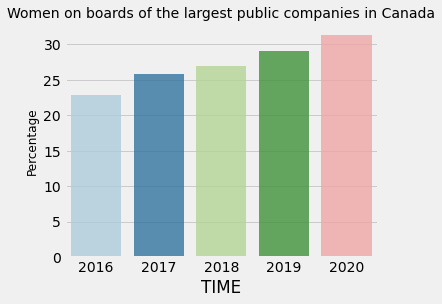

In [16]:
# Female share of seats on boards of the largest publicly listed companies in Canada
plt.figure(figsize=(5, 4))
sns.barplot(x='TIME', y='female_share_of_seats_on_boards_of_the_largest_publicly_listed_companies', 
            palette='Paired', data=df_ind_EMP11[(df_ind_EMP11['Country'] == 'Canada')], ci=None, alpha=0.8)
plt.title('Women on boards of the largest public companies in Canada', fontsize=14)
plt.ylabel('Percentage',fontsize = 12);

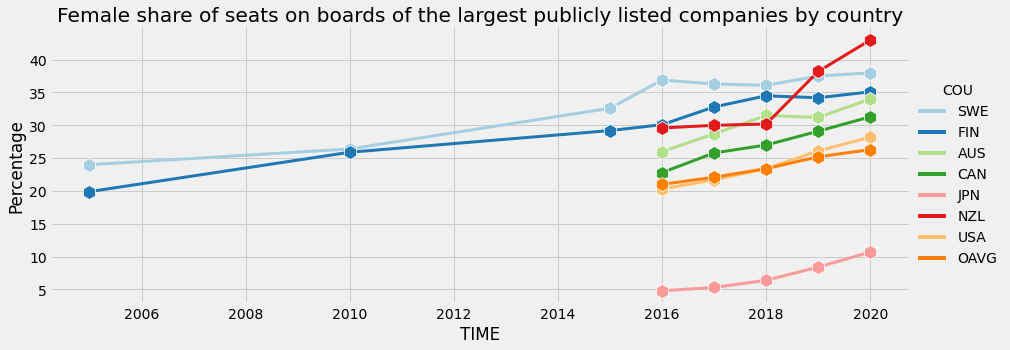

In [17]:
# Female share of seats on boards of the largest publicly listed companies
# plt.figure(figsize=(12, 7))
sns.relplot(x='TIME', y='female_share_of_seats_on_boards_of_the_largest_publicly_listed_companies', hue='COU', kind='line',
            palette='Paired', data=df_ind_EMP11[df_ind_EMP11.COU.isin(['USA', 'AUS', 'CAN', 'GRB', 'NZL', 'FIN', 'JPN', 'SWE', 'OAVG'])], 
            marker='h', linewidth=3, markersize=14, height=4.8, aspect=2.7)
plt.title('Female share of seats on boards of the largest publicly listed companies by country')
plt.ylabel('Percentage');

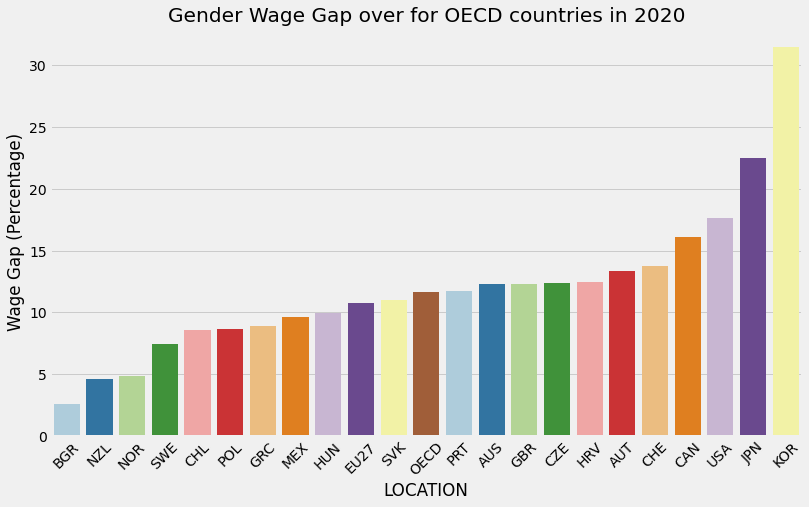

In [25]:
# Gender wage gap in percentage by country in 2020
plt.figure(figsize=(12, 7))
sns.barplot(y='gender_wage_gap', x='LOCATION', 
            data=gender_wage_gap[(gender_wage_gap.TIME == 2020) & (gender_wage_gap.SUBJECT == 'EMPLOYEE')].sort_values('gender_wage_gap'),
            palette='Paired')
plt.title('Gender Wage Gap over for OECD countries in 2020')
plt.ylabel('Wage Gap (Percentage)');
plt.xticks(rotation =45);

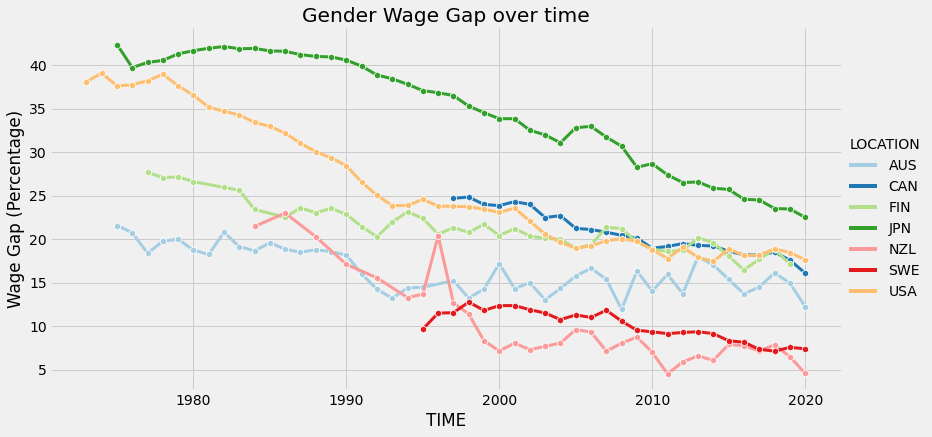

In [32]:
# Gender wage gap by years
# countries with the most data
sns.relplot(x='TIME', y='gender_wage_gap', kind='line',
            data=gender_wage_gap[(gender_wage_gap.SUBJECT == 'EMPLOYEE') & (gender_wage_gap['LOCATION'].isin(['USA', 'AUS', 'CAN', 'GRB', 'NZL', 'FIN', 'JPN', 'SWE']))],
            hue='LOCATION', palette='Paired', marker='h', linewidth=3, markersize=7, height=6, aspect=2)
plt.title('Gender Wage Gap over time')
plt.ylabel('Wage Gap (Percentage)');

### Data preparation

In [34]:
#@title Filter dataframes for Canada by year.

gender_wage_gap_CAN = gender_wage_gap[(gender_wage_gap['LOCATION'] == 'CAN') &
                                      (gender_wage_gap['SUBJECT'] == 'EMPLOYEE')].reset_index(drop=True) # full-time employees
gender_wage_gap_CAN_year = gender_wage_gap_CAN[['TIME', 'gender_wage_gap']].set_index('TIME')


avg_wages_CAN = avg_wages[(avg_wages['LOCATION'] == 'CAN')].reset_index(drop=True)
avg_wages_CAN_year = avg_wages_CAN[['TIME', 'avg_wages']].set_index('TIME')

wage_levels_CAN = wage_levels[(wage_levels['LOCATION'] == 'CAN')].reset_index(drop=True)
# The incidence of low pay refers to the share of workers earning less than two-thirds of median earnings.
wage_levels_CAN_LPAY = wage_levels_CAN[(wage_levels_CAN['SUBJECT'] == 'LPAY')].reset_index(drop=True)
wage_levels_CAN_LPAY_year = wage_levels_CAN_LPAY[['TIME', 'wage_levels']].set_index('TIME').rename(columns={'wage_levels':'wage_levels_LPAY'})
# The incidence of high pay refers to the share of workers earning more than one-and-a-half time median earnings.
wage_levels_CAN_HPAY = wage_levels_CAN[(wage_levels_CAN['SUBJECT'] == 'HPAY')].reset_index(drop=True)
wage_levels_CAN_HPAY_year = wage_levels_CAN_HPAY[['TIME', 'wage_levels']].set_index('TIME').rename(columns={'wage_levels':'wage_levels_HPAY'})

empl_rate_CAN = empl_rate[(empl_rate['LOCATION'] == 'CAN') &
                          (empl_rate['SUBJECT'] == 'TOT') & # Total population
                          (empl_rate['MEASURE'] == 'PC_WKGPOP') & # % of working population
                          (empl_rate['FREQUENCY'] == 'A')].reset_index(drop=True)
empl_rate_CAN_year = empl_rate_CAN[['TIME', 'employment_rate']].set_index('TIME')

pop_CAN = pop[(pop['LOCATION'] == 'CAN') &
              (pop['SUBJECT'] == 'TOT') &
              (pop['MEASURE'] == 'AGRWTH')].reset_index(drop=True) # Growth rates
pop_CAN_year = pop_CAN[['TIME', 'pop']].set_index('TIME')

gdp_CAN = gdp[(gdp['LOCATION'] == 'CAN') &
              (gdp['MEASURE'] == 'USD_CAP')].reset_index(drop=True)
gdp_CAN_year = gdp_CAN[['TIME', 'gdp']].set_index('TIME')


In [35]:
#@title Merge Dataframes

from functools import reduce

dfs_oecd = [gender_wage_gap, avg_wages, empl_rate, wage_levels, gdp, pop]
dfs_CAN = [gender_wage_gap_CAN, avg_wages_CAN, wage_levels_CAN, empl_rate_CAN, gdp_CAN, pop_CAN]
can_year_dfs = [gender_wage_gap_CAN_year, avg_wages_CAN_year, empl_rate_CAN_year, wage_levels_CAN_LPAY_year, wage_levels_CAN_HPAY_year, gdp_CAN_year, pop_CAN_year] 
df_OECD = reduce(lambda  left,right: pd.merge(left,right,on=['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE','FREQUENCY','TIME'],
                                            how='outer'), dfs_oecd).drop(columns=['FREQUENCY'])
df_CAN = reduce(lambda  left,right: pd.merge(left,right,on=['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE','FREQUENCY','TIME'],
                                            how='outer'), dfs_CAN).drop(columns=['FREQUENCY'])
df_CAN_year = pd.concat(can_year_dfs, axis=1)
df_CAN_year

,gender_wage_gap,avg_wages,employment_rate,wage_levels_LPAY,wage_levels_HPAY,gdp,pop
TIME,,,,,,,
1951.0,NaN,NaN,NaN,NaN,NaN,NaN,2.137145
1952.0,NaN,NaN,NaN,NaN,NaN,NaN,3.199333
1953.0,NaN,NaN,NaN,NaN,NaN,NaN,2.663212
1954.0,NaN,NaN,NaN,NaN,NaN,NaN,2.971262
1955.0,NaN,NaN,NaN,NaN,NaN,NaN,2.685821
...,...,...,...,...,...,...,...
2017.0,18.173222,52765.069129,73.15833,22.010781,22.505658,48317.191163,1.206907
2018.0,18.518519,53730.107898,73.53333,20.679295,22.176115,49892.028612,1.422572
2019.0,17.607143,54119.309875,74.15000,20.679295,22.176115,49286.811601,1.425073


In [36]:
df_CAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LOCATION         269 non-null    object 
 1   INDICATOR        269 non-null    object 
 2   SUBJECT          269 non-null    object 
 3   MEASURE          269 non-null    object 
 4   TIME             269 non-null    float64
 5   gender_wage_gap  24 non-null     float64
 6   avg_wages        31 non-null     float64
 7   wage_levels      46 non-null     float64
 8   employment_rate  46 non-null     float64
 9   gdp              52 non-null     float64
 10  pop              70 non-null     float64
dtypes: float64(7), object(4)
memory usage: 25.2+ KB


In [37]:
df_CAN_year.describe()

,gender_wage_gap,avg_wages,employment_rate,wage_levels_LPAY,wage_levels_HPAY,gdp,pop
count,24.000000,31.000000,46.000000,23.000000,23.000000,52.000000,70.000000
mean,20.759119,46701.614847,69.407245,21.858166,21.458927,26173.171338,1.436728
std,2.549739,5127.922799,3.273919,0.724222,1.051065,14458.160258,0.603625
min,16.112532,40070.423426,62.933330,20.630793,19.578151,4590.894787,0.749132
25%,18.889965,42114.704418,67.006250,21.274462,20.508260,13848.852445,1.011670
50%,20.293207,45824.168945,70.166665,22.008782,21.563114,23767.909793,1.193719
75%,23.007212,51606.609671,72.264578,22.362518,22.299649,39706.368201,1.658647
max,24.855491,55342.042895,74.150000,23.250934,23.143756,50722.491679,3.283472


In [38]:
df_CAN_year.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 71 entries, 1951.0 to 2021.0
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender_wage_gap   24 non-null     float64
 1   avg_wages         31 non-null     float64
 2   employment_rate   46 non-null     float64
 3   wage_levels_LPAY  23 non-null     float64
 4   wage_levels_HPAY  23 non-null     float64
 5   gdp               52 non-null     float64
 6   pop               70 non-null     float64
dtypes: float64(7)
memory usage: 4.4 KB


In [39]:
df_CAN_year.isnull().sum()

gender_wage_gap     47
avg_wages           40
employment_rate     25
wage_levels_LPAY    48
wage_levels_HPAY    48
gdp                 19
pop                  1
dtype: int64

### Explore correlation


In [40]:
# correlation matix
df_CAN_year.dropna().corr()

,gender_wage_gap,avg_wages,employment_rate,wage_levels_LPAY,wage_levels_HPAY,gdp,pop
gender_wage_gap,1.000000,-0.970594,-0.726123,0.414989,-0.886949,-0.972089,-0.519848
avg_wages,-0.970594,1.000000,0.696335,-0.412676,0.918462,0.979242,0.553230
employment_rate,-0.726123,0.696335,1.000000,-0.176172,0.614793,0.792540,0.484731
wage_levels_LPAY,0.414989,-0.412676,-0.176172,1.000000,-0.342456,-0.387030,-0.538220
wage_levels_HPAY,-0.886949,0.918462,0.614793,-0.342456,1.000000,0.882691,0.294549
gdp,-0.972089,0.979242,0.792540,-0.387030,0.882691,1.000000,0.593470
pop,-0.519848,0.553230,0.484731,-0.538220,0.294549,0.593470,1.000000


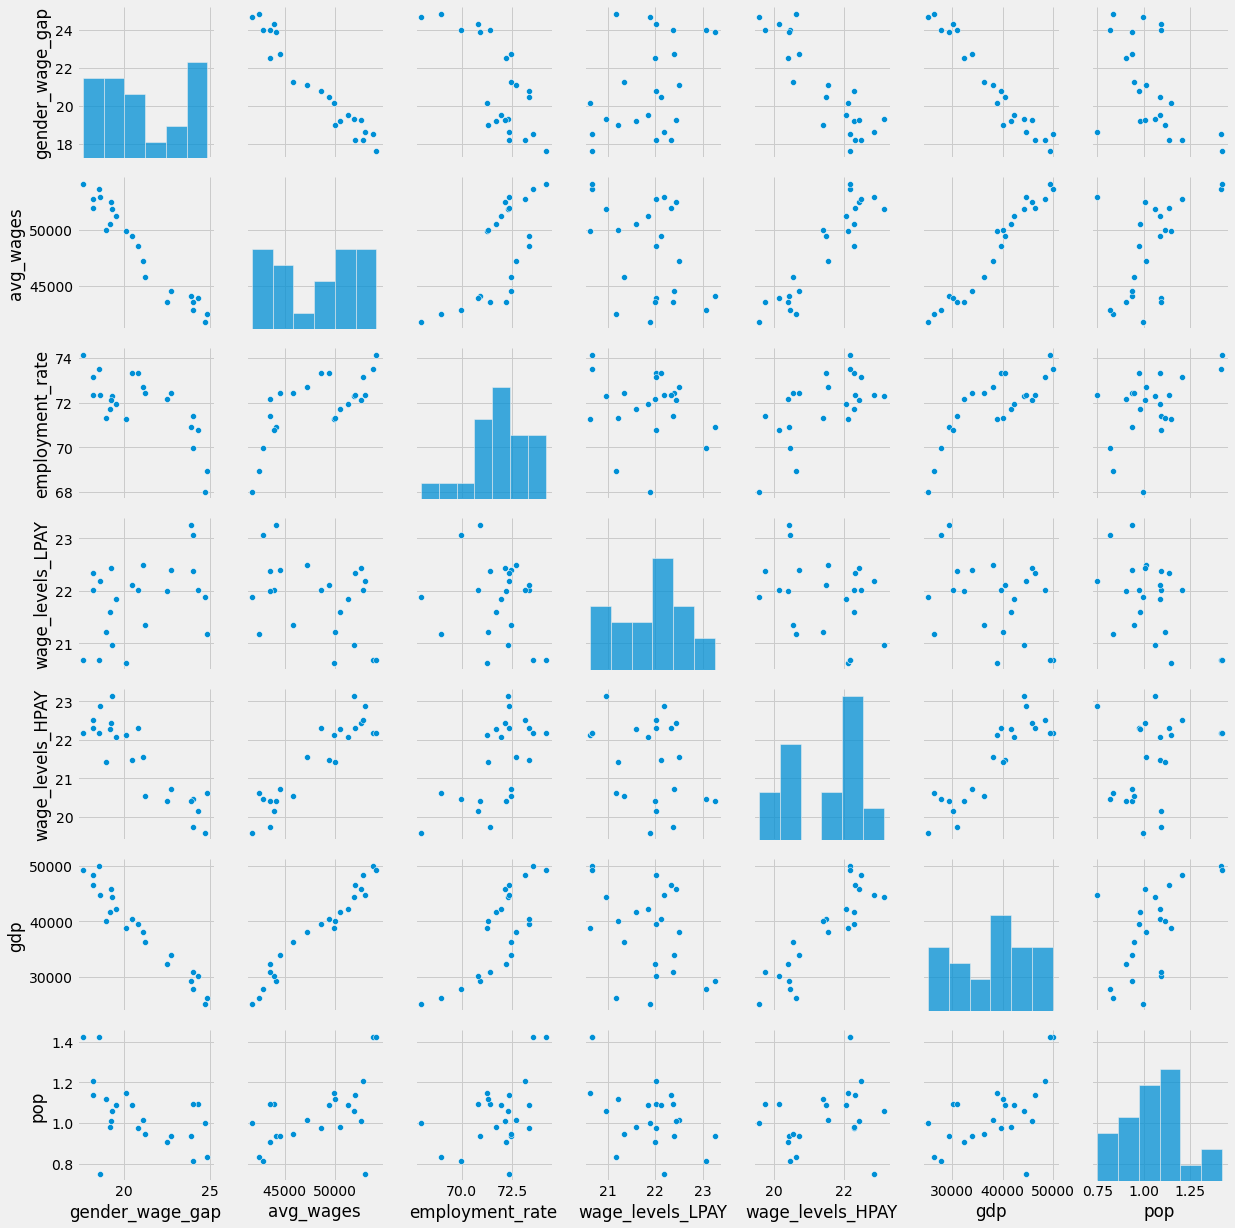

In [42]:
# correlation matix plot
sns.pairplot(df_CAN_year.dropna(), palette='Paired');

Text(0.5, 1.0, 'Gender Wage Gap over time in Canada')

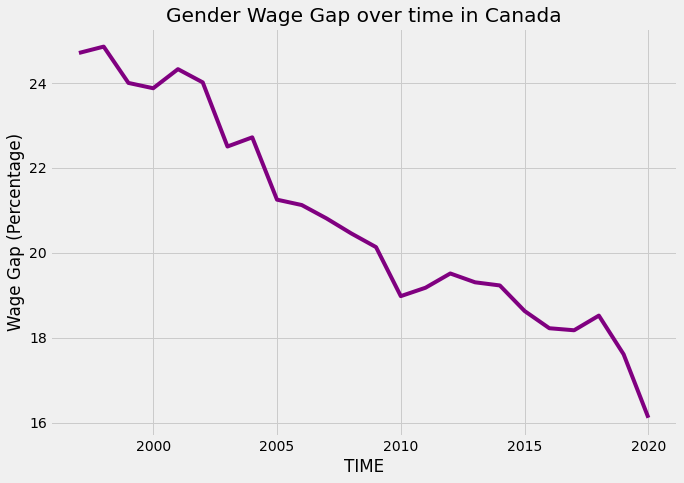

In [45]:
# Gender wage gap by year for Canada
plt.figure(figsize=(10, 7))
sns.lineplot(x=df_CAN_year.index, y='gender_wage_gap', data=df_CAN_year, color='purple');
plt.ylabel('Wage Gap (Percentage)')
plt.title('Gender Wage Gap over time in Canada')

### Preliminary analysis

Text(0.5, 1.0, 'Effect of the Average Wage on the Gender Wage Gap')

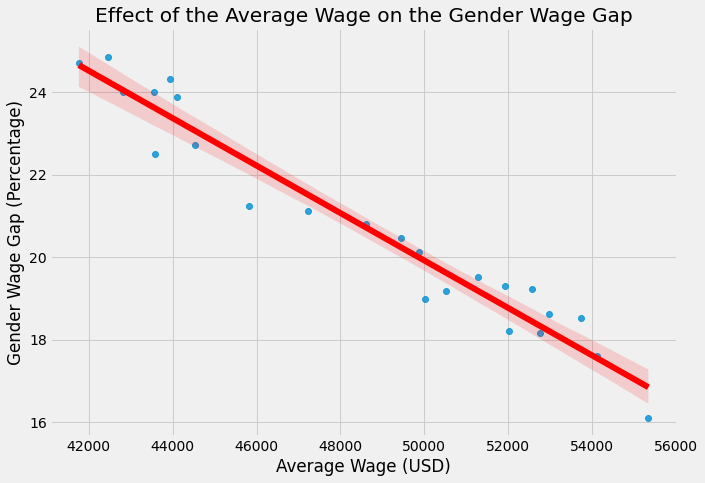

In [46]:
# Plot data and linear regression model fit
plt.figure(figsize=(10, 7))
sns.regplot(x='avg_wages',y='gender_wage_gap', data=df_CAN_year, line_kws={'color': 'red'});
plt.xlabel("Average Wage (USD)")
plt.ylabel("Gender Wage Gap (Percentage)")
plt.title("Effect of the Average Wage on the Gender Wage Gap")

Text(0.5, 1.0, 'Residuals of the effect of the Average Wage on Gender Wage Gap')

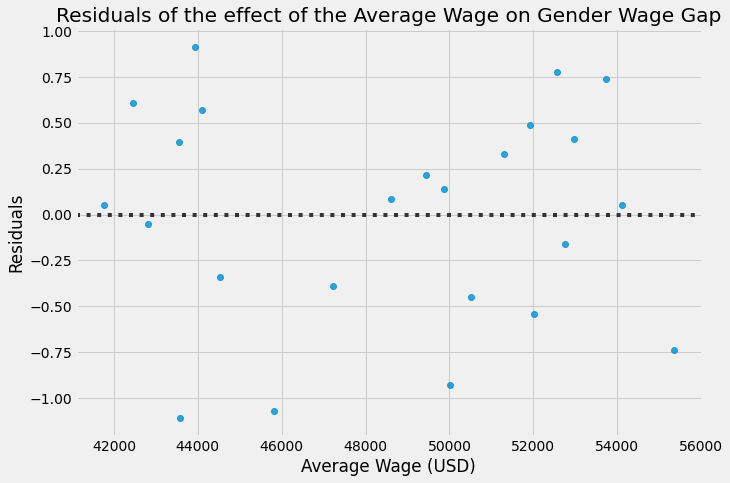

In [47]:
plt.figure(figsize=(10, 7))
sns.residplot(x='avg_wages',y='gender_wage_gap', data=df_CAN_year);
plt.xlabel("Average Wage (USD)")
plt.ylabel('Residuals')
plt.title("Residuals of the effect of the Average Wage on Gender Wage Gap")

In [48]:
# Create an OLS model

lm_1 = sm.ols('gender_wage_gap ~ avg_wages', data=df_CAN_year).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        gender_wage_gap   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     389.1
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.78e-15
Time:                        00:33:28   Log-Likelihood:                -20.874
No. Observations:                  24   AIC:                             45.75
Df Residuals:                      22   BIC:                             48.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.6454      1.419     34.280      0.000      45.703      51.588
avg_wages     -0.0006   2.91e-05    -19.726      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        1.659   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.318
Skew:                          -0.389   Prob(JB):                        0.517
Kurtosis:                       2.155   Cond. No.                     5.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals of the effect of the Employment Rate on Gender Wage Gap')

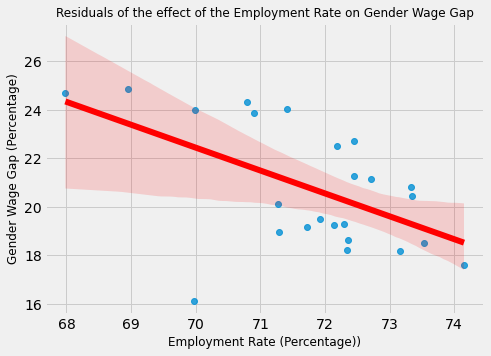

In [49]:
# Plot data and linear regression model fit
plt.figure(figsize=(7, 5))
sns.regplot(x='employment_rate',y='gender_wage_gap', data=df_CAN_year, line_kws={'color': 'red'});
plt.xlabel("Employment Rate (Percentage))", fontsize = 12)
plt.ylabel('Gender Wage Gap (Percentage)', fontsize = 12)
plt.title("Residuals of the effect of the Employment Rate on Gender Wage Gap", fontsize = 12)

Text(0.5, 1.0, 'Residuals of the effect of the Average Wage on Gender Wage Gap')

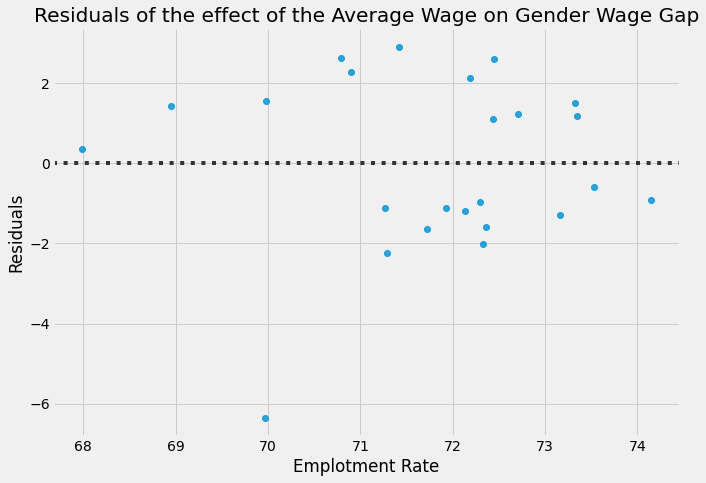

In [50]:
# Plot the residuals of a linear regression.
plt.figure(figsize=(10, 7))
sns.residplot(x='employment_rate',y='gender_wage_gap', data=df_CAN_year);
plt.xlabel("Emplotment Rate")
plt.ylabel('Residuals')
plt.title("Residuals of the effect of the Average Wage on Gender Wage Gap")

In [51]:
lm_2 = sm.ols('gender_wage_gap ~ employment_rate', data=df_CAN_year).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        gender_wage_gap   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     9.253
Date:                Sun, 15 May 2022   Prob (F-statistic):            0.00598
Time:                        00:33:28   Log-Likelihood:                -51.795
No. Observations:                  24   AIC:                             107.6
Df Residuals:                      22   BIC:                             109.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          88.4786     22.267      3.973      0.001      42.299     134.658
employment_rate    -0.9435      0.310     -3.042      0.006      -1.587      -0.300
==============================================================================
Omnibus:                        6.693   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.520
Skew:                          -0.885   Prob(JB):                        0.104
Kurtosis:                       4.178   Cond. No.                     3.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

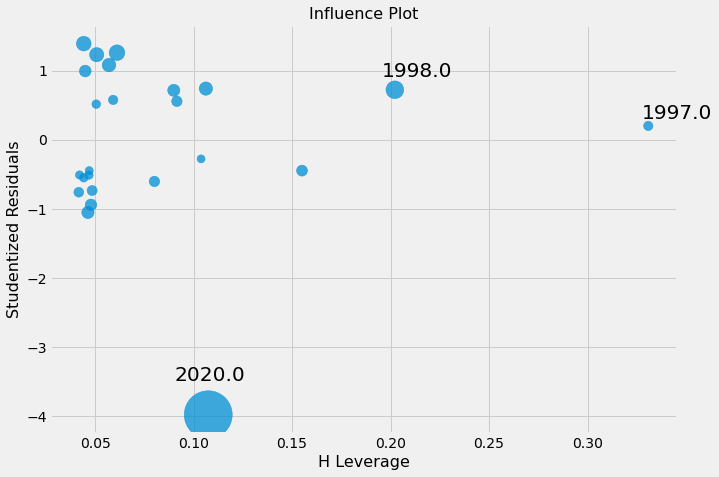

In [52]:
fig, ax = plt.subplots(figsize=(10,7))
fig = influence_plot(lm_2, ax=ax, criterion='cooks')

Text(0.5, 1.0, 'Effect of the Low Wage Level on the Gender Wage Gap')

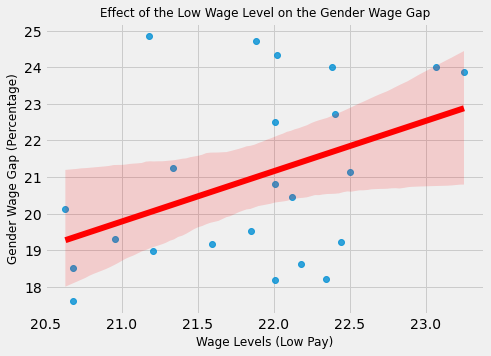

In [53]:
# Plot data and linear regression model fit
plt.figure(figsize=(7, 5))
sns.regplot(x='wage_levels_LPAY',y='gender_wage_gap', data=df_CAN_year, line_kws={'color': 'red'});
plt.xlabel("Wage Levels (Low Pay)", fontsize = 12)
plt.ylabel('Gender Wage Gap (Percentage)', fontsize = 12)
plt.title("Effect of the Low Wage Level on the Gender Wage Gap", fontsize = 12)

Text(0.5, 1.0, 'Residuals of the effect of the Wage Level on the Gender Wage Gap')

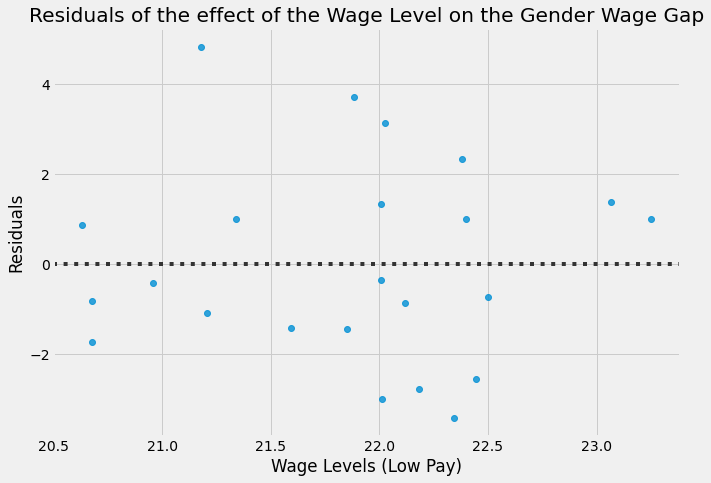

In [54]:
# Plot the residuals of a linear regression.
plt.figure(figsize=(10, 7))
sns.residplot(x='wage_levels_LPAY',y='gender_wage_gap', data=df_CAN_year);
plt.xlabel("Wage Levels (Low Pay)")
plt.ylabel('Residuals')
plt.title("Residuals of the effect of the Wage Level on the Gender Wage Gap")

In [55]:
lm_3 = sm.ols('gender_wage_gap ~ wage_levels_LPAY', data=df_CAN_year).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        gender_wage_gap   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.369
Date:                Sun, 15 May 2022   Prob (F-statistic):             0.0489
Time:                        00:33:29   Log-Likelihood:                -50.112
No. Observations:                  23   AIC:                             104.2
Df Residuals:                      21   BIC:                             106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -9.1318     14.405     -0.634      0.533     -39.088      20.824
wage_levels_LPAY     1.3767      0.659      2.090      0.049       0.007       2.747
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   0.396
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.951
Skew:                           0.435   Prob(JB):                        0.622
Kurtosis:                       2.515   Cond. No.                         677.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

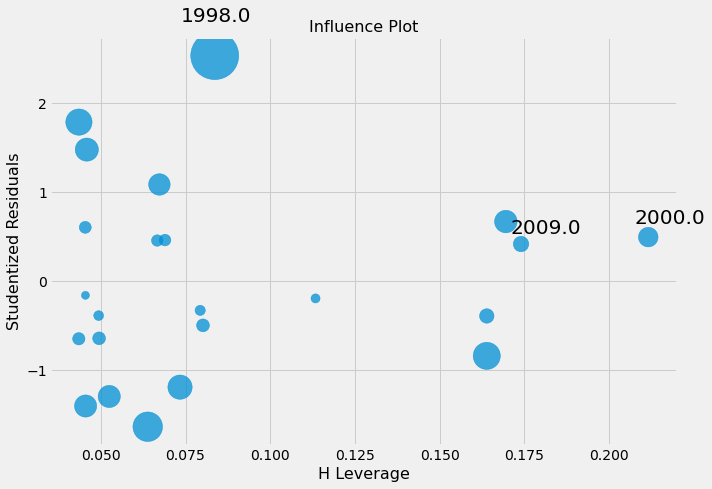

In [56]:
fig, ax = plt.subplots(figsize=(10,7))
fig = influence_plot(lm_3, ax=ax, criterion='cooks')

Text(0.5, 1.0, 'Effect of Wage Level on the Gender Wage Gap')

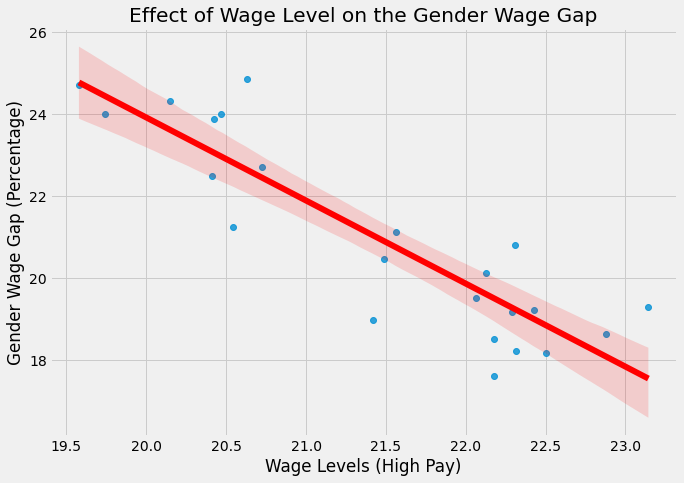

In [57]:
# Plot data and linear regression model fit
plt.figure(figsize=(10, 7))
sns.regplot(x='wage_levels_HPAY',y='gender_wage_gap', data=df_CAN_year, line_kws={'color': 'red'});
plt.xlabel("Wage Levels (High Pay)")
plt.ylabel('Gender Wage Gap (Percentage)')
plt.title("Effect of Wage Level on the Gender Wage Gap")

Text(0.5, 1.0, 'Residuals of the effect of Wage Level on the Gender Wage Gap')

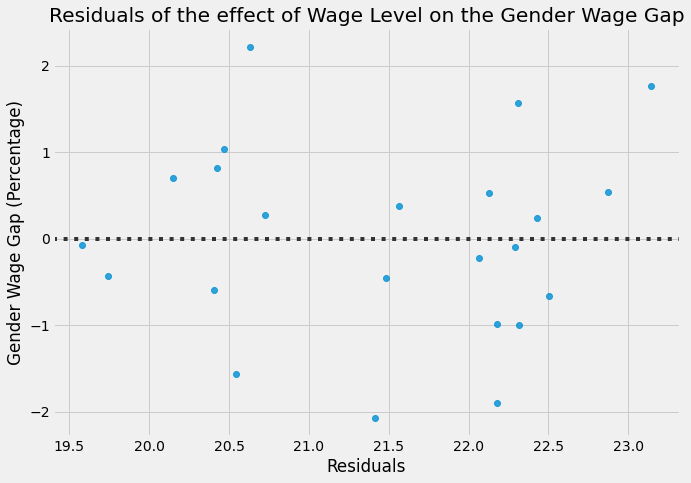

In [58]:
# Plot the residuals of a linear regression.
plt.figure(figsize=(10, 7))
sns.residplot(x='wage_levels_HPAY',y='gender_wage_gap', data=df_CAN_year);
plt.xlabel("Residuals")
plt.ylabel('Gender Wage Gap (Percentage)')
plt.title("Residuals of the effect of Wage Level on the Gender Wage Gap")

In [59]:
lm_4 = sm.ols('gender_wage_gap ~ wage_levels_HPAY', data=df_CAN_year).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        gender_wage_gap   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     77.44
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.73e-08
Time:                        00:33:30   Log-Likelihood:                -34.518
No. Observations:                  23   AIC:                             73.04
Df Residuals:                      21   BIC:                             75.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           64.4685      4.950     13.025      0.000      54.175      74.762
wage_levels_HPAY    -2.0275      0.230     -8.800      0.000      -2.507      -1.548
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.192
Skew:                           0.013   Prob(JB):                        0.909
Kurtosis:                       2.554   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

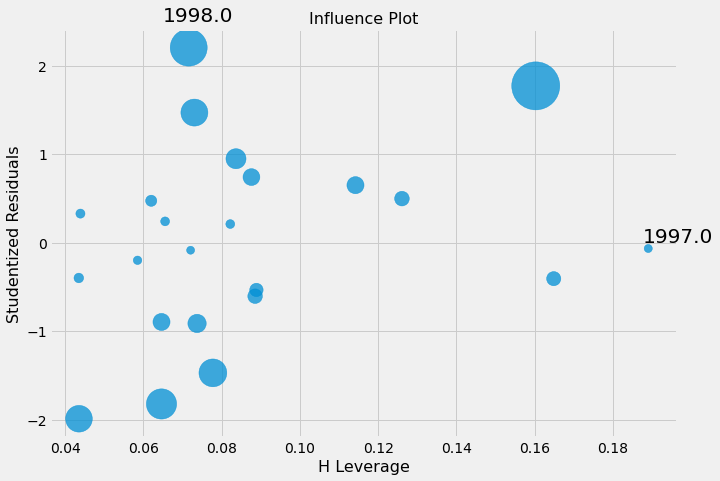

In [60]:
fig, ax = plt.subplots(figsize=(10,7))
fig = influence_plot(lm_4, ax=ax, criterion='cooks')

Text(0.5, 1.0, 'The effect of GDP on the Gender Wage Gap')

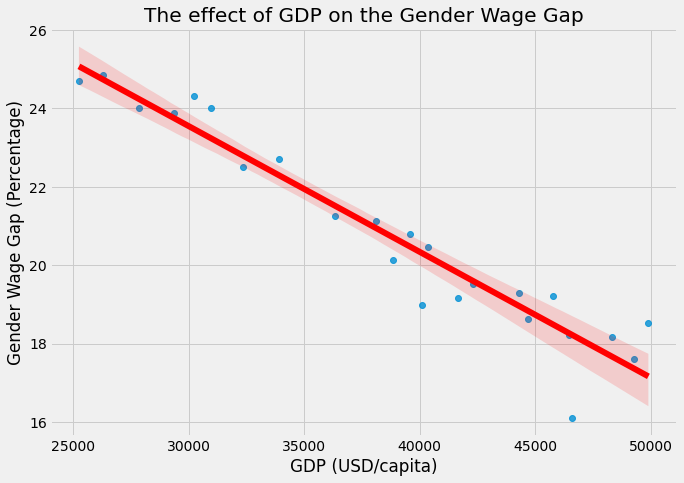

In [61]:
# Plot data and linear regression model fit
plt.figure(figsize=(10, 7))
sns.regplot(x='gdp',y='gender_wage_gap', data=df_CAN_year, line_kws={'color': 'red'});
plt.xlabel('GDP (USD/capita)')
plt.ylabel("Gender Wage Gap (Percentage)")
plt.title("The effect of GDP on the Gender Wage Gap")

Text(0.5, 1.0, 'Residuals of the effect of GDP on the Gender Wage Gap')

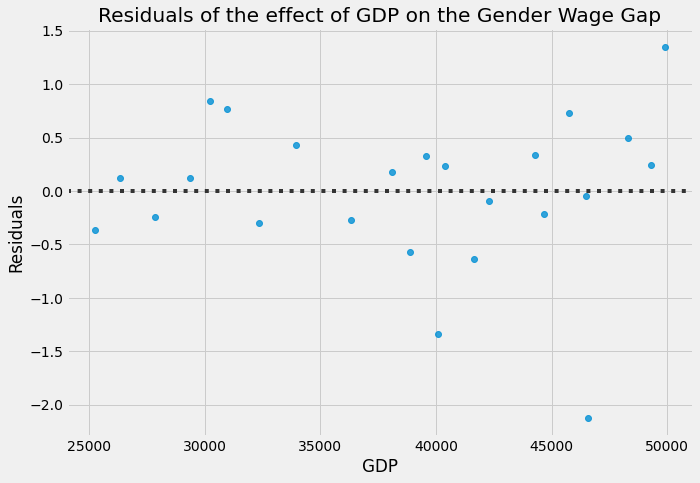

In [62]:
# Plot the residuals of a linear regression.
plt.figure(figsize=(10, 7))
sns.residplot(x='gdp',y='gender_wage_gap', data=df_CAN_year);
plt.xlabel("GDP")
plt.ylabel('Residuals')
plt.title("Residuals of the effect of GDP on the Gender Wage Gap")

In [63]:
lm_5 = sm.ols('gender_wage_gap ~ gdp', data=df_CAN_year).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        gender_wage_gap   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.45e-13
Time:                        00:33:31   Log-Likelihood:                -25.658
No. Observations:                  24   AIC:                             55.32
Df Residuals:                      22   BIC:                             57.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.1803      0.794     41.799      0.000      31.534      34.827
gdp           -0.0003   2.01e-05    -15.936      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        8.871   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.002
Skew:                          -0.979   Prob(JB):                       0.0302
Kurtosis:                       4.779   Cond. No.                     2.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

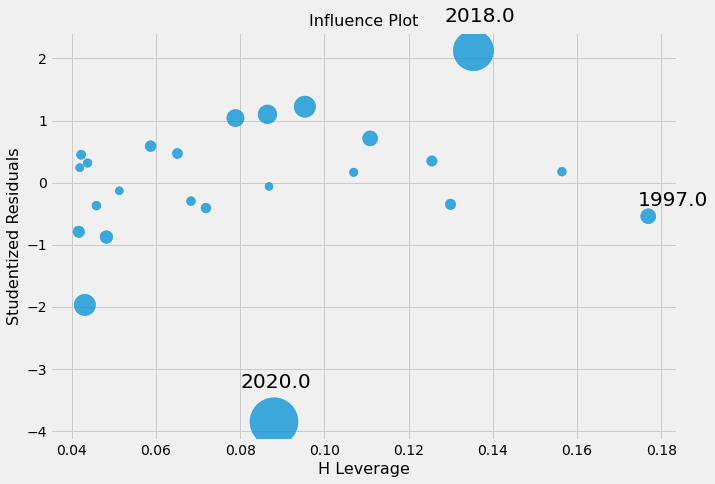

In [64]:
fig, ax = plt.subplots(figsize=(10,7))
fig = influence_plot(lm_5, ax=ax, criterion='cooks')


Text(0.5, 1.0, 'The effect of the Population Growth Rate on the Gender Wage Gap')

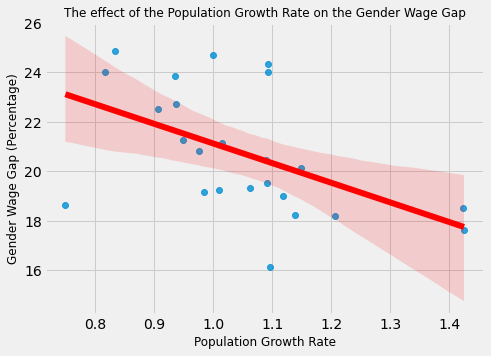

In [65]:
# Plot data and linear regression model fit
plt.figure(figsize=(7, 5))
sns.regplot(x='pop',y='gender_wage_gap', data=df_CAN_year, line_kws={'color': 'red'});
plt.xlabel('Population Growth Rate', fontsize =12)
plt.ylabel("Gender Wage Gap (Percentage)", fontsize =12)
plt.title("The effect of the Population Growth Rate on the Gender Wage Gap", fontsize =12)

Text(0.5, 1.0, 'Residuals of the effect of Population Growth Rate on the Gender Wage Gap')

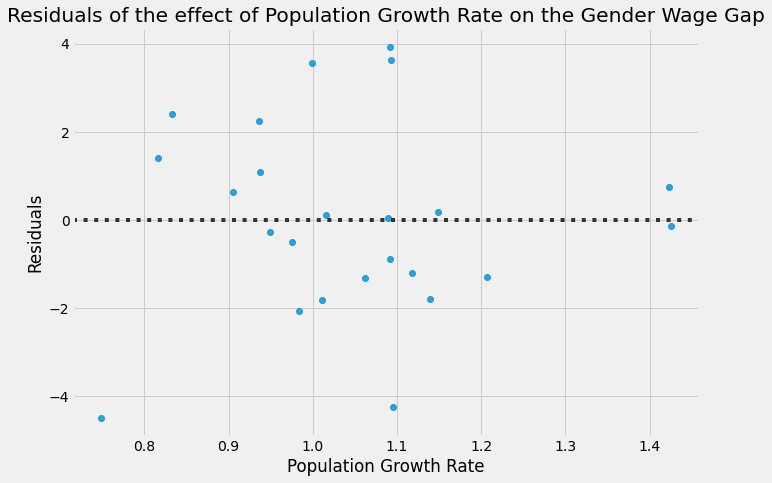

In [66]:
# Plot the residuals of a linear regression.
plt.figure(figsize=(10, 7))
sns.residplot(x='pop',y='gender_wage_gap', data=df_CAN_year);
plt.xlabel("Population Growth Rate")
plt.ylabel('Residuals')
plt.title("Residuals of the effect of Population Growth Rate on the Gender Wage Gap")


In [67]:
lm_6 = sm.ols('gender_wage_gap ~ pop', data=df_CAN_year).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        gender_wage_gap   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     7.477
Date:                Sun, 15 May 2022   Prob (F-statistic):             0.0121
Time:                        00:33:32   Log-Likelihood:                -52.497
No. Observations:                  24   AIC:                             109.0
Df Residuals:                      22   BIC:                             111.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0772      3.077      9.451      0.000      22.697      35.458
pop           -7.9556      2.909     -2.734      0.012     -13.989      -1.922
==============================================================================
Omnibus:                        0.054   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.073
Skew:                          -0.043   Prob(JB):                        0.964
Kurtosis:                       2.743   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

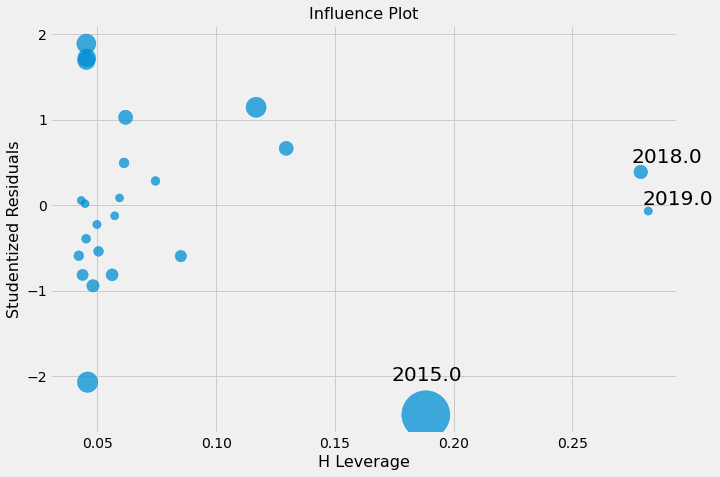

In [68]:
fig, ax = plt.subplots(figsize=(10,7))
fig = influence_plot(lm_6, ax=ax, criterion='cooks')

In [69]:
## I've decided to investigate how the Wage gap is correlated to GDP
df_CAN_year.iloc[39]

gender_wage_gap              NaN
avg_wages           40070.423426
employment_rate        70.350000
wage_levels_LPAY             NaN
wage_levels_HPAY             NaN
gdp                 20229.752821
pop                     1.519083
Name: 1990.0, dtype: float64

In [74]:
# gdp + avg wage
g_a = sm.ols("gender_wage_gap ~ gdp + avg_wages", data=df_CAN_year).fit()
print(g_a.summary())

                            OLS Regression Results                            
Dep. Variable:        gender_wage_gap   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sun, 15 May 2022   Prob (F-statistic):           2.54e-14
Time:                        00:33:33   Log-Likelihood:                -20.232
No. Observations:                  24   AIC:                             46.46
Df Residuals:                      21   BIC:                             50.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.1792      3.523     12.823      0.0

In [75]:
print('Parameters: ', g_a.params)
print('R2: ', g_a.rsquared)

Parameters:  Intercept    45.179223
gdp          -0.000078
avg_wages    -0.000441
dtype: float64
R2:  0.9492725385850563


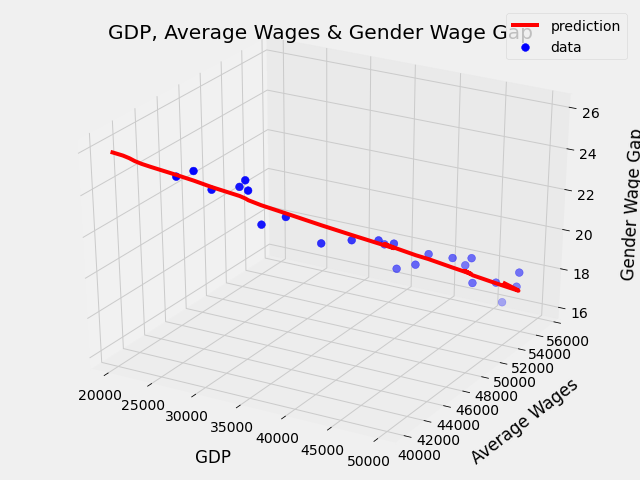

In [76]:
X = np.array(df_CAN_year.gdp)
Y = np.array(df_CAN_year.avg_wages)
Z = -0.000078*X - 0.000441*Y + 45.179223

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z, 'red', label='prediction')
ax.legend()
ax.set_title('GDP, Average Wages & Gender Wage Gap')
Zp = np.array(df_CAN_year.gender_wage_gap)
ax.scatter3D(X, Y, Zp, s = 60, c='blue', label='data')
ax.legend()
ax.set_xlabel('GDP', labelpad=20)
ax.set_ylabel('Average Wages', labelpad=20)
ax.set_zlabel('Gender Wage Gap', labelpad=20)
plt.show()

In [77]:
# avg_wages + Wage level high
w_l = sm.ols("gender_wage_gap ~ avg_wages + wage_levels_HPAY", data=df_CAN_year).fit()
print(w_l.summary())

                            OLS Regression Results                            
Dep. Variable:        gender_wage_gap   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 15 May 2022   Prob (F-statistic):           4.17e-13
Time:                        00:33:33   Log-Likelihood:                -19.505
No. Observations:                  23   AIC:                             45.01
Df Residuals:                      20   BIC:                             48.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           47.3367      3.525  

In [78]:
print('Parameters: ', w_l.params)
print('R2: ', w_l.rsquared)

Parameters:  Intercept           47.336727
avg_wages           -0.000576
wage_levels_HPAY     0.065846
dtype: float64
R2:  0.9421832974130829


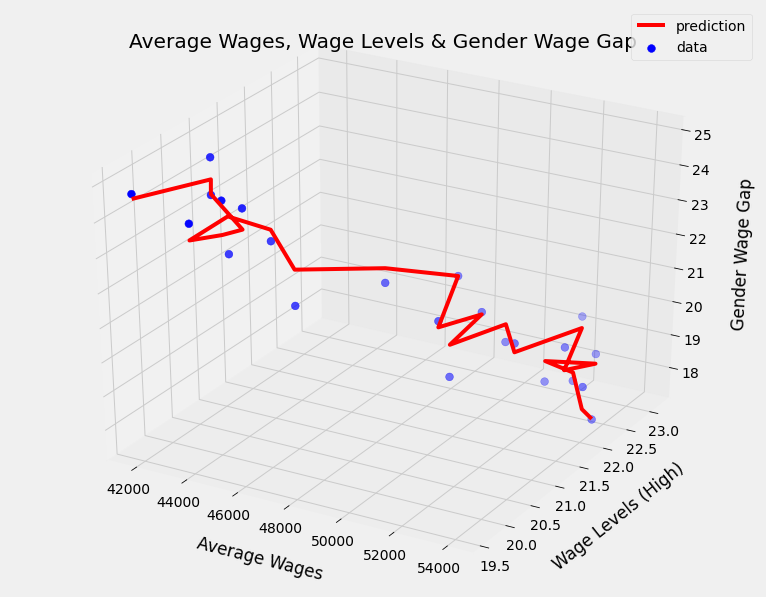

In [79]:
X = np.array(df_CAN_year.avg_wages)
Y = np.array(df_CAN_year.wage_levels_HPAY)
Z = -0.000576*X + 0.065846*Y + 47.336727

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z, 'red', label='prediction')
ax.legend()
ax.set_title('Average Wages, Wage Levels & Gender Wage Gap')
Zp = np.array(df_CAN_year.gender_wage_gap)
ax.scatter3D(X, Y, Zp, s = 60, c='blue', label='data')
ax.legend()
ax.set_xlabel('Average Wages', labelpad=20)
ax.set_ylabel('Wage Levels (High)', labelpad=20)
ax.set_zlabel('Gender Wage Gap', labelpad=20)
plt.show()

In [80]:
# Wage levels + gdp
l_g = sm.ols("gender_wage_gap ~ wage_levels_HPAY + gdp",data=df_CAN_year).fit()
print(l_g.summary())

                            OLS Regression Results                            
Dep. Variable:        gender_wage_gap   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.25e-13
Time:                        00:33:33   Log-Likelihood:                -18.121
No. Observations:                  23   AIC:                             42.24
Df Residuals:                      20   BIC:                             45.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           37.7645      4.179  

In [81]:
print('Parameters: ', l_g.params)
print('R2: ', l_g.rsquared)

Parameters:  Intercept           37.764455
wage_levels_HPAY    -0.299063
gdp                 -0.000271
dtype: float64
R2:  0.9487370802803357


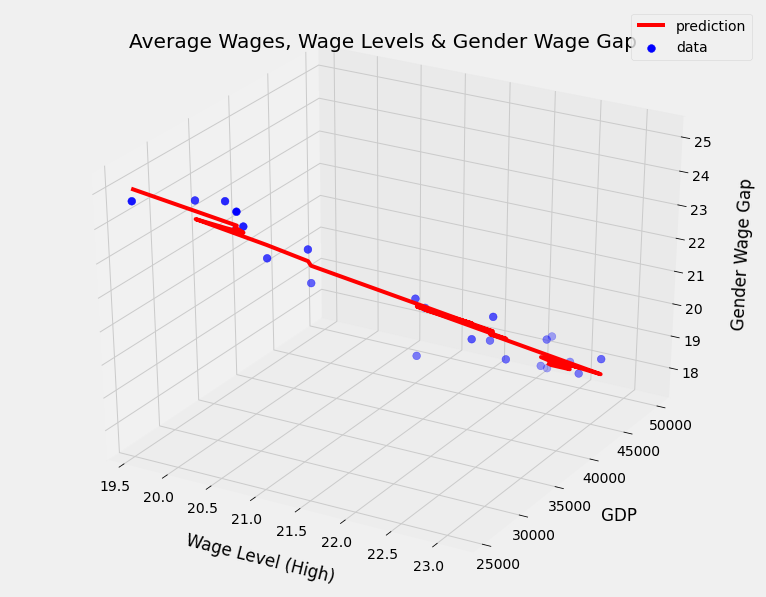

In [82]:
X = np.array(df_CAN_year.wage_levels_HPAY)
Y = np.array(df_CAN_year.gdp)
Z = -0.299063*X - 0.000271*Y + 37.764455

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z, 'red', label='prediction')
ax.legend()
ax.set_title('Average Wages, Wage Levels & Gender Wage Gap')
Zp = np.array(df_CAN_year.gender_wage_gap)
ax.scatter3D(X, Y, Zp, s = 60, c='blue', label='data')
ax.legend()
ax.set_xlabel('Wage Level (High)', labelpad=20)
ax.set_ylabel('GDP', labelpad=20)
ax.set_zlabel('Gender Wage Gap', labelpad=20)
plt.show()

In [83]:
# avg_wages + Wage levels + gdp
results_com = sm.ols("gender_wage_gap ~ avg_wages + wage_levels_HPAY + gdp",data=df_CAN_year).fit()
print(results_com.summary())

                            OLS Regression Results                            
Dep. Variable:        gender_wage_gap   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     130.1
Date:                Sun, 15 May 2022   Prob (F-statistic):           7.63e-13
Time:                        00:33:34   Log-Likelihood:                -16.981
No. Observations:                  23   AIC:                             41.96
Df Residuals:                      19   BIC:                             46.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           40.5186      4.525  

In [85]:
print('Parameters: ', results_com.params)
print('R2: ', results_com.rsquared)

Parameters:  Intercept           40.518561
avg_wages           -0.000241
wage_levels_HPAY    -0.065601
gdp                 -0.000170
dtype: float64
R2:  0.9535770046865641
